## 1.Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

## 2. Load and Prepare Data:

In [2]:
df=pd.read_csv("tele_churn.csv")
df

,Unnamed: 0,Number of Referrals,Monthly Charge,Total Regular Charges,Churn Status,Total Customer Svc Requests,Product/Service Issues Reported,Tenure in Months_1 - 12,Tenure in Months_13 - 24,Tenure in Months_25 - 36,...,Gender_Female,Gender_Male,Under 30_No,Under 30_Yes,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes
0,0,0,41.236,39.65,1,5,0,1,0,0,...,0,1,1,0,0,1,1,0,1,0
1,1,1,83.876,633.30,1,5,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
2,2,0,99.268,1752.55,1,1,0,0,1,0,...,0,1,1,0,0,1,1,0,0,1
3,3,1,102.440,2514.50,1,1,1,0,0,1,...,1,0,1,0,0,1,0,1,0,1
4,4,1,79.560,2868.15,1,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,21.150,1419.40,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
7039,7039,1,84.800,1990.50,0,2,0,0,1,0,...,0,1,1,0,1,0,0,1,0,1
7040,7040,4,103.200,7362.90,0,2,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1
7041,7041,1,29.600,346.45,0,0,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head() #first 5 rows of the data

,Number of Referrals,Monthly Charge,Total Regular Charges,Churn Status,Total Customer Svc Requests,Product/Service Issues Reported,Tenure in Months_1 - 12,Tenure in Months_13 - 24,Tenure in Months_25 - 36,Tenure in Months_37 - 48,...,Gender_Female,Gender_Male,Under 30_No,Under 30_Yes,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes
0,0,41.236,39.65,1,5,0,1,0,0,0,...,0,1,1,0,0,1,1,0,1,0
1,1,83.876,633.30,1,5,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,0,99.268,1752.55,1,1,0,0,1,0,0,...,0,1,1,0,0,1,1,0,0,1
3,1,102.440,2514.50,1,1,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,1
4,1,79.560,2868.15,1,1,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,1


In [5]:
df.tail() #last 5 rows of the data

,Number of Referrals,Monthly Charge,Total Regular Charges,Churn Status,Total Customer Svc Requests,Product/Service Issues Reported,Tenure in Months_1 - 12,Tenure in Months_13 - 24,Tenure in Months_25 - 36,Tenure in Months_37 - 48,...,Gender_Female,Gender_Male,Under 30_No,Under 30_Yes,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes
7038,0,21.15,1419.40,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
7039,1,84.80,1990.50,0,2,0,0,1,0,0,...,0,1,1,0,1,0,0,1,0,1
7040,4,103.20,7362.90,0,2,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1
7041,1,29.60,346.45,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,1
7042,0,105.65,6844.50,0,1,2,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [6]:
x=df.drop('Churn Status',axis=1) #features (independent variables)
x

,Number of Referrals,Monthly Charge,Total Regular Charges,Total Customer Svc Requests,Product/Service Issues Reported,Tenure in Months_1 - 12,Tenure in Months_13 - 24,Tenure in Months_25 - 36,Tenure in Months_37 - 48,Tenure in Months_49 - 60,...,Gender_Female,Gender_Male,Under 30_No,Under 30_Yes,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes
0,0,41.236,39.65,5,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
1,1,83.876,633.30,5,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,0,99.268,1752.55,1,0,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,1
3,1,102.440,2514.50,1,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
4,1,79.560,2868.15,1,0,0,0,0,1,0,...,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,21.150,1419.40,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
7039,1,84.800,1990.50,2,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,1
7040,4,103.200,7362.90,2,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1
7041,1,29.600,346.45,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1


In [7]:
y=df['Churn Status'] # Target variable (dependent variable)
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Status, Length: 7043, dtype: int64

### Train Test Split-Split the data into training and testing sets

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## 3. Feature Scaling

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

## 4.Modelling

## 1. Logistic Regression Model

In [10]:
model_lr = LogisticRegression(random_state=30)
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=30)

##  Make Predictions

In [11]:
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

##  Evaluate the Model

In [12]:
# Accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {lr_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1555
           1       0.84      0.79      0.81       558

    accuracy                           0.91      2113
   macro avg       0.88      0.87      0.88      2113
weighted avg       0.90      0.91      0.90      2113

Confusion Matrix:
[[1473   82]
 [ 118  440]]


Logistic Regression Model generated **99%** accuracy in data prediction

## 2.Decision Tree Classifier

In [13]:
model_dt = DecisionTreeClassifier(random_state=30)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=30)

In [14]:
y_pred_dt = model_dt.predict(x_test)
y_pred_dt

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [24]:
# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {dt_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1555
           1       0.75      0.77      0.76       558

    accuracy                           0.87      2113
   macro avg       0.83      0.84      0.83      2113
weighted avg       0.87      0.87      0.87      2113

Confusion Matrix:
[[1413  142]
 [ 131  427]]


### Decision Tree Model generated **100%** accuracy in data prediction

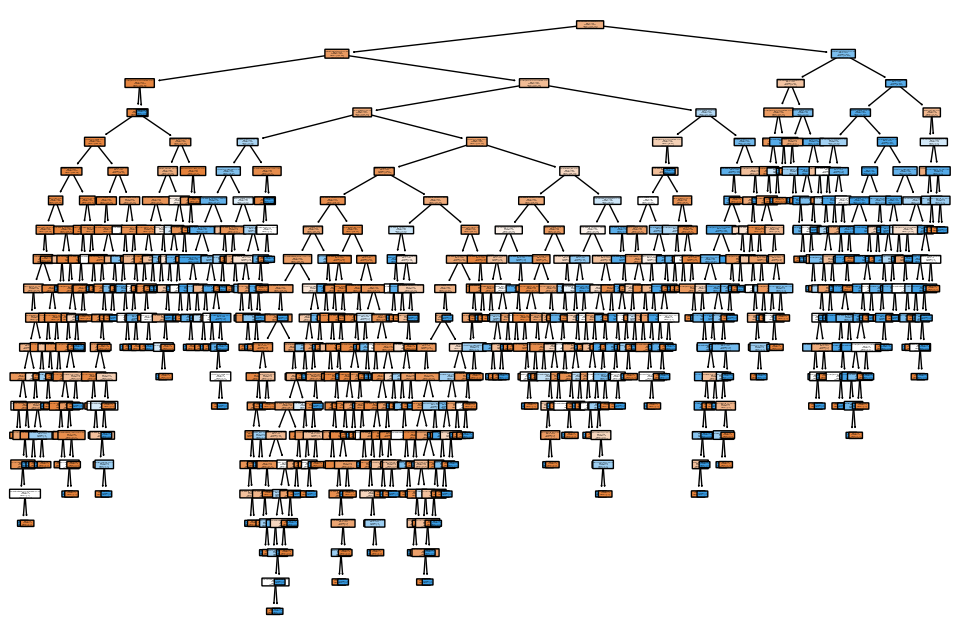

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model_dt, feature_names=x.columns, class_names=['Not Churn', 'Churn'], filled=True, rounded=True)
plt.show()


## 3.Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model_rf = RandomForestClassifier(random_state=30)

In [28]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=30)

In [29]:
y_pred_rf=model_rf.predict(x_test)

In [30]:
# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {rf_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1555
           1       0.88      0.76      0.82       558

    accuracy                           0.91      2113
   macro avg       0.90      0.86      0.88      2113
weighted avg       0.91      0.91      0.91      2113

Confusion Matrix:
[[1499   56]
 [ 134  424]]


### Random Forest Model generated **99%** accuracy in data prediction

### Feature Importance

In [31]:
# Access feature importances
feature_importances = model_rf.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                            Feature  Importance
3       Total Customer Svc Requests    0.155804
1                    Monthly Charge    0.082059
2             Total Regular Charges    0.076542
4   Product/Service Issues Reported    0.071879
43          Contract_Month-to-Month    0.062705
..                              ...         ...
8          Tenure in Months_37 - 48    0.003846
17                 Phone Service_No    0.003433
18                Phone Service_Yes    0.003378
14                    Offer_Offer C    0.002419
12                    Offer_Offer A    0.001563

[61 rows x 2 columns]


## 4.Support Vector Machine Model

In [32]:
model_svm = SVC(kernel='linear', random_state=30)  # You can also try other kernels like 'rbf' or 'poly'
model_svm.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=30)

In [33]:
y_pred_svm = model_svm.predict(X_test_scaled)
y_pred_svm

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {svm_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1555
           1       0.85      0.79      0.82       558

    accuracy                           0.91      2113
   macro avg       0.89      0.87      0.88      2113
weighted avg       0.91      0.91      0.91      2113

Confusion Matrix:
[[1477   78]
 [ 118  440]]


### SVM Model generated **99%** accuracy in data prediction

## 5.K-Nearest Neighbors (KNN)

In [35]:
model = KNeighborsClassifier(n_neighbors=6)  
model.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=6)

In [36]:
y_pred_knn = model.predict(X_test_scaled)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
# Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {knn_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1555
           1       0.80      0.61      0.69       558

    accuracy                           0.86      2113
   macro avg       0.84      0.78      0.80      2113
weighted avg       0.85      0.86      0.85      2113

Confusion Matrix:
[[1471   84]
 [ 220  338]]


### KNN Model generated 86% accuracy in data prediction 

## 6.Gradient Boosting(XGBoost)

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_xgb = XGBClassifier(random_state=30)
model_xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [39]:
y_pred_xgb = model_xgb.predict(x_test)
y_pred_xgb

array([0, 0, 1, ..., 0, 0, 0])

In [40]:
# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {xgb_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1555
           1       0.86      0.84      0.85       558

    accuracy                           0.92      2113
   macro avg       0.90      0.89      0.90      2113
weighted avg       0.92      0.92      0.92      2113

Confusion Matrix:
[[1481   74]
 [  91  467]]


In [41]:
# Access feature importances
feature_importances = model_xgb.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                            Feature  Importance
43          Contract_Month-to-Month    0.219476
3       Total Customer Svc Requests    0.089578
21              Internet Service_No    0.068435
4   Product/Service Issues Reported    0.055895
45                Contract_Two Year    0.054148
..                              ...         ...
26               Internet Type_None    0.000000
22             Internet Service_Yes    0.000000
20               Multiple Lines_Yes    0.000000
18                Phone Service_Yes    0.000000
60                   Dependents_Yes    0.000000

[61 rows x 2 columns]


### **Gradient Boosting(XGBoost)Model generated 99.7% accuracy in data prediction.**

## 7.Naive Bayes Model

In [42]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)


GaussianNB()

In [43]:
y_pred_nb = model_nb.predict(x_test)
y_pred_nb

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
# Accuracy
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {nb_accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1555
           1       0.61      0.83      0.70       558

    accuracy                           0.81      2113
   macro avg       0.77      0.82      0.78      2113
weighted avg       0.84      0.81      0.82      2113

Confusion Matrix:
[[1258  297]
 [  96  462]]


### Naive Bayes Model generated 87%accuracy in data prediction.

In [45]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest','Gradient Boost','Naive Bayes'],
    'Score': [lr_accuracy, svm_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy,xgb_accuracy,nb_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,0.921912,Gradient Boost
1,0.910080,Random Forest
2,0.907241,Support Vector Machine
3,0.905348,Logistic Regression
4,0.870800,Decision Tree
5,0.856129,K-Nearest Neighbor
6,0.814009,Naive Bayes


In [47]:
#Generate confusion matrix for Gradient Boost model as it has maximum Accuracy

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[1481   74]
 [  91  467]]


In [48]:
# Predict the probability of Churn of each customer
df['Probability of Churn'] = model_xgb.predict_proba(df[x_test.columns])[:,1]

In [49]:
# Create a Dataframe showcasing probability of Churn of each customer
df[['Churn Status','Probability of Churn']].head()

,Churn Status,Probability of Churn
0,1,0.999573
1,1,0.998463
2,1,0.367557
3,1,0.898569
4,1,0.308168


In [50]:
df[['Churn Status','Probability of Churn']].tail()

,Churn Status,Probability of Churn
7038,0,0.000475
7039,0,0.000193
7040,0,0.000162
7041,0,0.069821
7042,0,0.002149


In [51]:
df[['Churn Status','Probability of Churn']]

,Churn Status,Probability of Churn
0,1,0.999573
1,1,0.998463
2,1,0.367557
3,1,0.898569
4,1,0.308168
...,...,...
7038,0,0.000475
7039,0,0.000193
7040,0,0.000162
7041,0,0.069821


In [52]:
df['Probability of Churn'].unique()

array([9.9957281e-01, 9.9846327e-01, 3.6755702e-01, ..., 1.6237015e-04,
       6.9820799e-02, 2.1487642e-03], dtype=float32)

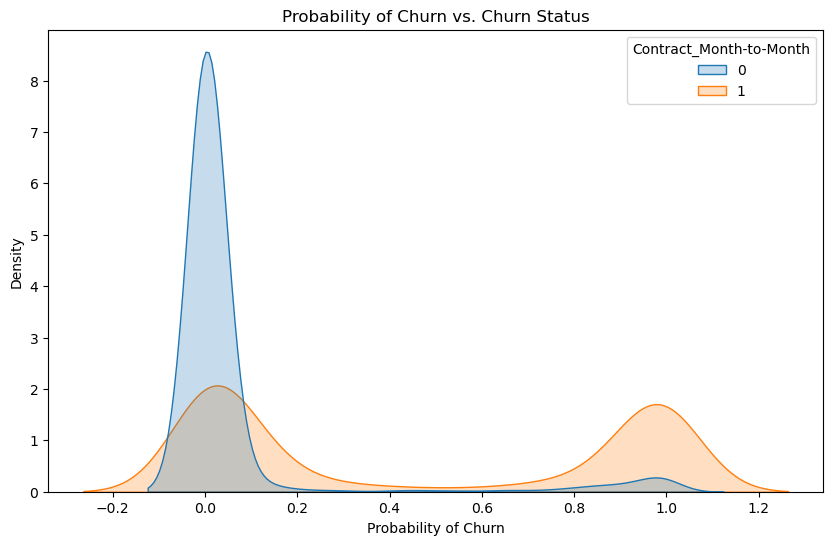

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the KDE plot

plt.figure(figsize=(10, 6))

sns.kdeplot(data=df, x='Probability of Churn', hue='Contract_Month-to-Month', fill=True, common_norm=False)
plt.title('Probability of Churn vs. Churn Status')
plt.xlabel('Probability of Churn')
plt.ylabel('Density')
plt.show()

### Pickling the model

In [58]:
import pickle

In [59]:
filename = 'model_xgb.sav'

In [60]:
pickle.dump(model_xgb, open(filename, 'wb'))

In [61]:
load_model = pickle.load(open(filename, 'rb'))

In [62]:
model_score_xgb = load_model.score(x_test, y_test)

In [64]:
model_score_xgb

0.9219119734973971

### Final model i.e. Gradient Boosting(XGBoost)Model, is now ready and dumped in model_xgb.sav, which can be used later.